<a href="https://colab.research.google.com/github/emily-coding-kim/sea-lamprey-model/blob/main/Sea_Lamprey_Modeling_%5BMath_142%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FP L: 50
FP Pm: 47.22222222222222
FP Pf: 8.333333333333334
FP Am: 0.35108024691358025
FP Af: 0.048611111111111105
FP Pm+Pf: 55.55555555555556
FP Am+Af: 0.39969135802469136
Total: 105.95524691358025
FP L: 50
FP Pm: 40.74074074074075
FP Pf: 14.814814814814815
FP Am: 0.28806584362139914
FP Af: 0.08641975308641975
FP Pm+Pf: 55.555555555555564
FP Am+Af: 0.3744855967078189
Total: 105.93004115226339
FP L: 50
FP Pm: 34.25925925925926
FP Pf: 21.296296296296294
FP Am: 0.2250514403292181
FP Af: 0.12422839506172838
FP Pm+Pf: 55.55555555555556
FP Am+Af: 0.3492798353909465
Total: 105.9048353909465
FP L: 50
FP Pm: 27.77777777777778
FP Pf: 27.77777777777778
FP Am: 0.16203703703703703
FP Af: 0.16203703703703703
FP Pm+Pf: 55.55555555555556
FP Am+Af: 0.32407407407407407
Total: 105.87962962962963


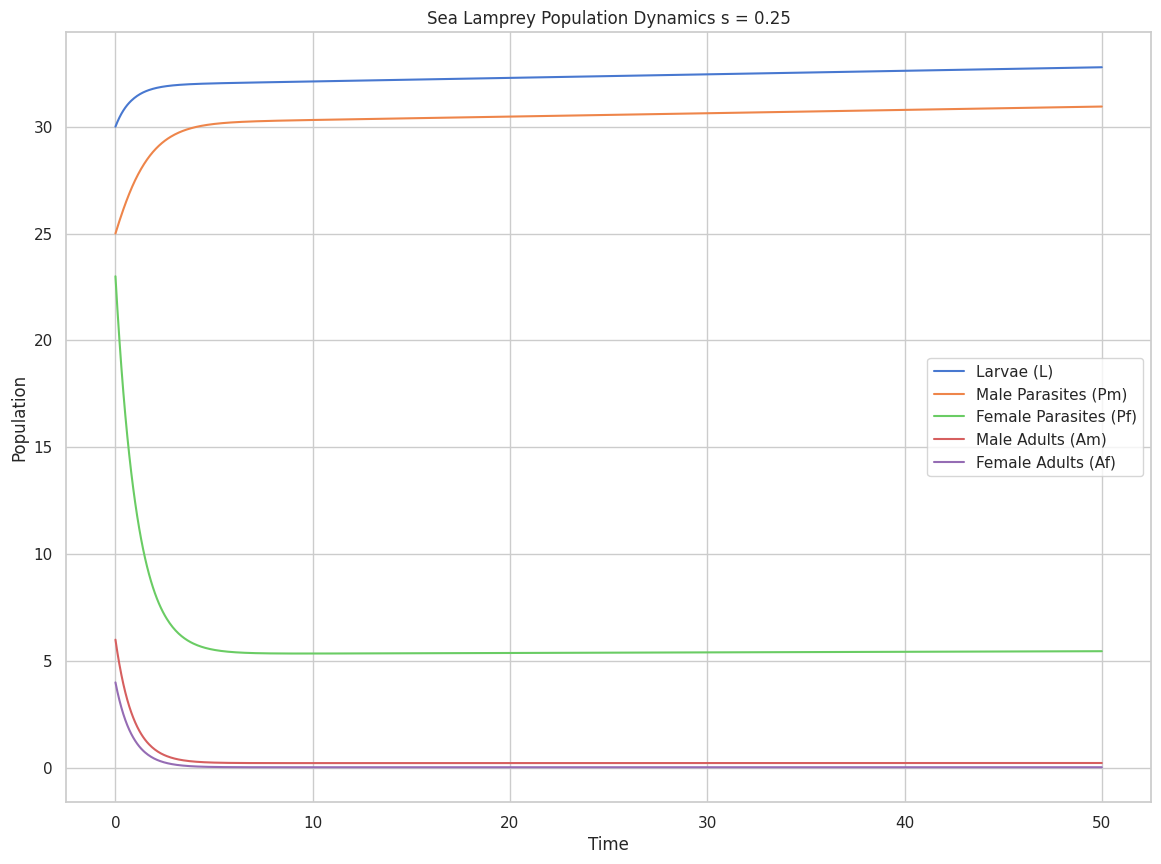

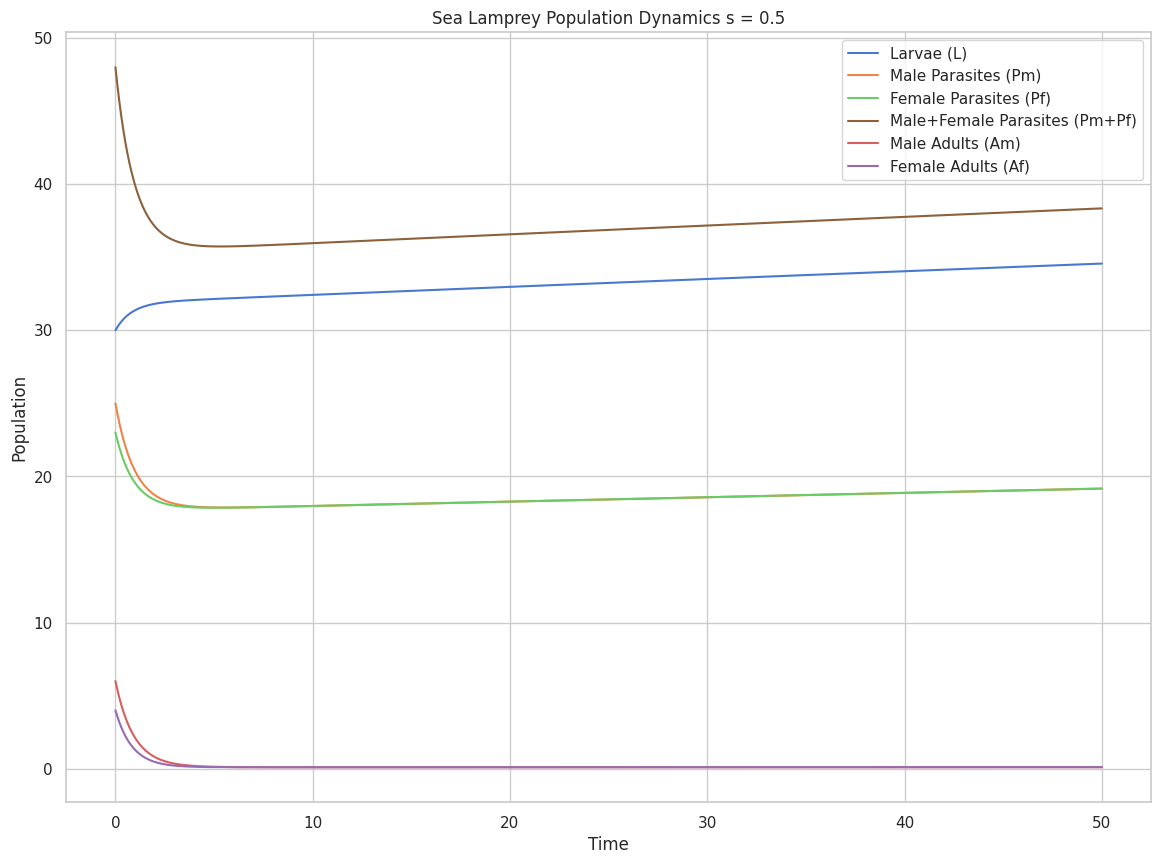

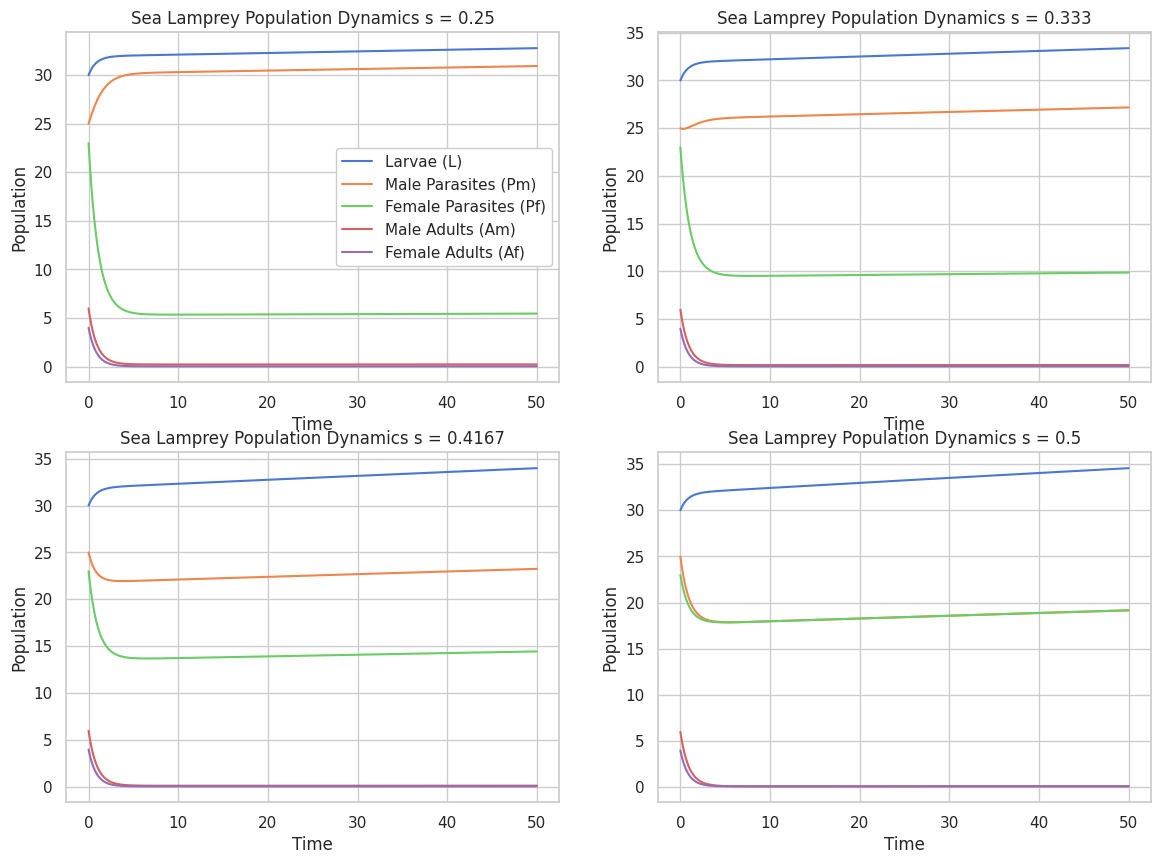

In [ ]:
#Code for the MCM model -- Sea Lamprey (Sandworm) Population Dynamics: Group 5 (Colin, Vivian, Emily)
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn theme for graphs
sns.set_theme(style="whitegrid")

# Define system of Differential Equations
def sea_lamprey_population(t, y, B, delta2, delta3, alpha, mu, ks, s):
    L, Pm, Pf, Am, Af = y

    # Differential Equations from our model
    dL_dt = B * mu * min(Af, Am) * (1 - L / ks)                  #ODE for Larvae
    dPm_dt = (1 - s) * L - delta2 * Pm                      #ODE for Male Parasites
    dPf_dt = s * L - delta2 * Pf                            #ODE for Female Parasites
    dAm_dt = alpha * Pm - delta3 * Am - mu * min(Af, Am)    #ODE for Male Adult Lamprey
    dAf_dt = alpha * Pf - delta3 * Af - mu * min(Af, Am)    #ODE for Female Adult Lamprey


    return [dL_dt, dPm_dt, dPf_dt, dAm_dt, dAf_dt]


# Default Parameters from Research to model the Sea Lamprey Population
B = 5              # Amt of larvee per adult rate
delta2 = 0.9        # Death rate for parasites
delta3 = 0.9        # Death rate for adults
alpha = 0.007         # Transition rate from parasite to adult
mu = 0.3             # Rate of breeding term
ks = 50           # Carrying capacity of larvae


# Initial Condition
L0 = 30
Pm0 = 25
Pf0 = 23
Am0 = 6
Af0 = 4

y0 = [L0, Pm0, Pf0, Am0, Af0]


t_span = (0, 50)                                   # Simulating from (start, end)
t_eval = np.linspace(t_span[0], t_span[1], 1000)    # Evaluation points

s_values = np.linspace(0.15, 0.50, 4)

# Solve ODEs using Runge-Kutta
solutions = {}
for s in s_values:
    solution = solve_ivp(
        sea_lamprey_population,
        t_span,
        y0,
        args=(B, delta2, delta3, alpha, mu, ks, s),
        t_eval=t_eval,
        method='RK45'
    )
    solutions[s] = solution

  # Non-Zero Fixed Point
    fpL = ks             # Initial larval population
    fpPm = (1-s) * ks / delta2             # Initial male parasite population
    fpPf = s * ks / delta2            # Initial female parasite population
    fpAm = (alpha * (1 - s) * ks / delta2 - mu * alpha * s * ks / delta2 / (delta3 + mu)) / delta3             # Initial male adult population
    fpAf = alpha * s * ks / delta2 / (delta3 + mu)             # Initial female adult population
    print(f"FP L: {fpL}")
    print(f"FP Pm: {fpPm}")
    print(f"FP Pf: {fpPf}")
    print(f"FP Am: {fpAm}")
    print(f"FP Af: {fpAf}")
    print(f"FP Pm+Pf: {fpPm + fpPf}")
    print(f"FP Am+Af: {fpAm + fpAf}")
    print(f"Total: {fpPm + fpPf + fpAm + fpAf + fpL}")

# Extract results
t1 = solutions[s_values[0]].t
L1, Pm1, Pf1, Am1, Af1 = solutions[s_values[0]].y

t2 = solutions[s_values[1]].t
L2, Pm2, Pf2, Am2, Af2 = solutions[s_values[1]].y

t3 = solutions[s_values[2]].t
L3, Pm3, Pf3, Am3, Af3 = solutions[s_values[2]].y

t4 = solutions[s_values[3]].t
L4, Pm4, Pf4, Am4, Af4 = solutions[s_values[3]].y

# # Calculate ratios
# parasite_ratio = Pm / Pf                                  # Male to Female Parasite ratio
# adult_ratio = Am / Af                                     # Male to Female Adult ratio
# total_parasites = Pm + Pf                                 # Total Parasites
# total_adults = Am + Af                                    # Total Adults
# parasite_to_adult_ratio = total_parasites / total_adults  # Parasites to Adults ratio


#### Figure 0.5 #####

palette = sns.color_palette("muted")
plt.figure(figsize=(14, 10))

sns.lineplot(x=t1, y=L1, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t1, y=Pm1, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t1, y=Pf1, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t1, y=Am1, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t1, y=Af1, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.25")
plt.legend()

palette = sns.color_palette("muted")
plt.figure(figsize=(14, 10))

sns.lineplot(x=t4, y=L4, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t4, y=Pm4, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t4, y=Pf4, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t4, y=Pm4 + Pf4, label="Male+Female Parasites (Pm+Pf)", color=palette[5])
sns.lineplot(x=t4, y=Am4, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t4, y=Af4, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.5")
plt.legend()


#### End of Figure 0.5 ####

################################ Figure 1 ###############################

# Plotting
palette = sns.color_palette("muted")
plt.figure(figsize=(14, 10))


# Population Over Time for s
plt.subplot(2, 2, 1)
sns.lineplot(x=t1, y=L1, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t1, y=Pm1, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t1, y=Pf1, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t1, y=Am1, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t1, y=Af1, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.25")
plt.legend(framealpha=1, markerscale=1.5)

plt.subplot(2, 2, 2)
sns.lineplot(x=t2, y=L2, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t2, y=Pm2, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t2, y=Pf2, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t2, y=Am2, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t2, y=Af2, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.333")
plt.legend().set_visible(False)

plt.subplot(2, 2, 3)
sns.lineplot(x=t3, y=L3, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t3, y=Pm3, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t3, y=Pf3, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t3, y=Am3, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t3, y=Af3, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.4167")
plt.legend().set_visible(False)

plt.subplot(2, 2, 4)
sns.lineplot(x=t4, y=L4, label="Larvae (L)", color=palette[0])
sns.lineplot(x=t4, y=Pm4, label="Male Parasites (Pm)", color=palette[1])
sns.lineplot(x=t4, y=Pf4, label="Female Parasites (Pf)", color=palette[2])
sns.lineplot(x=t4, y=Am4, label="Male Adults (Am)", color=palette[3])
sns.lineplot(x=t4, y=Af4, label="Female Adults (Af)", color=palette[4])
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Sea Lamprey Population Dynamics s = 0.5")
plt.legend().set_visible(False)


# # Male to Female Parasite Ratio Graph
# plt.subplot(2, 2, 2)
# sns.lineplot(x=t, y=parasite_ratio, label="Male/Female Parasite Ratio", color=palette[5])
# plt.axhline(1, color='red', linestyle='--', label="Equal Ratio")
# plt.xlabel("Time")
# plt.ylabel("Ratio")
# plt.title("Male to Female Parasite Ratio")
# plt.legend()

# # Male to Female Adult Ratio Graph
# plt.subplot(2, 2, 3)
# sns.lineplot(x=t, y=adult_ratio, label="Male/Female Adult Ratio", color=palette[6])
# plt.axhline(1, color='red', linestyle='--', label="Equal Ratio")
# plt.xlabel("Time")
# plt.ylabel("Ratio")
# plt.title("Male to Female Adult Ratio")
# plt.legend()

# # Parasite to Adult Ratio Graph
# plt.subplot(2, 2, 4)
# sns.lineplot(x=t, y=parasite_to_adult_ratio, label="Parasites to Adults Ratio", color=palette[7])
# plt.axhline(1, color='red', linestyle='--', label="Equal Ratio")
# plt.xlabel("Time")
# plt.ylabel("Ratio")
# plt.title("Parasites to Adults Ratio")
# plt.legend()

################################ END OF FIGURE 1 ###############################



In [ ]:
t_span1 = (0, 8000)                                   # Simulating from (start, end)
t_eval1 = np.linspace(t_span1[0], t_span1[1], 1000)    # Evaluation points

s_values = np.linspace(0.15, 0.50, 4)

solutions1 = {}
for s in s_values:
    solution1 = solve_ivp(
        sea_lamprey_population,
        t_span1,
        y0,
        args=(B, delta2, delta3, alpha, mu, ks, s),
        t_eval1=t_eval1,
        method='RK45'
    )
    solutions1[s] = solution1
#fixed points
    fpL0 = ks             # Initial larval population
    fpPm0 = (1-s) * ks / delta2             # Initial male parasite population
    fpPf0 = s * ks / delta2            # Initial female parasite population
    fpAm0 = (alpha * (1 - s) * ks / delta2 - mu * alpha * s * ks / delta2 / (delta3 + mu)) / delta3             # Initial male adult population
    fpAf0 = alpha * s * ks / delta2 / (delta3 + mu)             # Initial female adult population


# # Solve the system of equations numerically using Runge-Kutta 45 method
# solution = solve_ivp(
#     sea_lamprey_population,
#     t_span,
#     y0,
#     args=(B, delta2, delta3, alpha, mu, ks, s),
#     t_eval=t_eval,
#     method='RK45'
# )
# Extract results
at1 = solutions1[s_values[0]].t
aL1, aPm1, aPf1, aAm1, aAf1 = solutions1[s_values[0]].y

at2 = solutions1[s_values[1]].t
aL2, aPm2, aPf2, aAm2, aAf2 = solutions1[s_values[1]].y

at3 = solutions1[s_values[2]].t
aL3, aPm3, aPf3, aAm3, aAf3 = solutions1[s_values[2]].y

at4 = solutions1[s_values[3]].t
aL4, aPm4, aPf4, aAm4, aAf4 = solutions1[s_values[3]].y


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `t_eval1`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


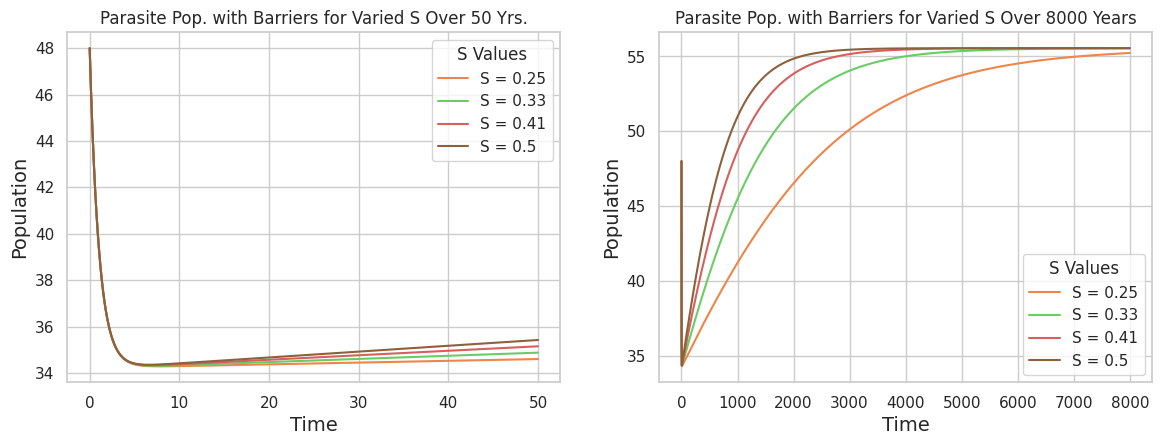

In [ ]:
palette = sns.color_palette("muted")
plt.figure(figsize=(14, 10))

# Plotting
plt.subplot(2, 2, 1)

# Population Over Time for
sns.lineplot(x=t1, y=Pm1 + Pf1, label="S = 0.25", color=palette[1])
sns.lineplot(x=t2, y=Pm2 + Pf2, label="S = 0.33", color=palette[2])
sns.lineplot(x=t3, y=Pm3 + Pf3, label="S = 0.41", color=palette[3])
sns.lineplot(x=t4, y=Pm4 + Pf4, label="S = 0.5", color=palette[5])

# Adjusting font sizes
plt.xlabel("Time", fontsize=14)  # Increase fontsize
plt.ylabel("Population", fontsize=14)  # Increase fontsize
plt.title("Parasite Pop. with Barriers for Varied S Over 50 Yrs.", fontsize=12)  # Increase fontsize
plt.legend(loc='upper right',      # Position the legend
           title="S Values",  # Optional legend title
           title_fontsize=12      # Title font size
          )

# Plotting
plt.subplot(2, 2, 2)

# Population Over Time for
sns.lineplot(x=at1, y=aPm1 + aPf1, label="S = 0.25", color=palette[1])
sns.lineplot(x=at2, y=aPm2 + aPf2, label="S = 0.33", color=palette[2])
sns.lineplot(x=at3, y=aPm3 + aPf3, label="S = 0.41", color=palette[3])
sns.lineplot(x=at4, y=aPm4 + aPf4, label="S = 0.5", color=palette[5])

# Adjusting font sizes
plt.xlabel("Time", fontsize=14)  # Increase fontsize
plt.ylabel("Population", fontsize=14)  # Increase fontsize
plt.title("Parasite Pop. with Barriers for Varied S Over 8000 Years", fontsize=12)  # Increase fontsize
plt.legend(loc='lower right',      # Position the legend
           title="S Values",  # Optional legend title
           title_fontsize=12      # Title font size
          )




################################ END OF FIGURE 1.5 ###############################

In [ ]:




################################ Figure 2 #####################################

t_span = (0, 30)                                   # Simulating from (start, end)
t_eval = np.linspace(t_span[0], t_span[1], 1000)


# Define the range for s and amt of samples : (start, stop, num_samples)
s_values = np.linspace(0.25, 0.5, 4)

# Prepare to store results of ratios from different S trials
ratios_over_time = {'parasite_ratio': {}, 'adult_ratio': {}}

# Prepare to store results of percentages from different S trials
percentages_over_time = {'male_percent_parasites': {}, 'male_percent_adults': {}}

# Solve the system and compute ratios and percentages @ each s
for s in s_values:
    solution = solve_ivp(
        sea_lamprey_population,
        t_span,
        y0,
        args=(B, delta2, delta3, alpha, mu, ks, s),
        t_eval=t_eval,
        method='RK45'
    )
    # Compute male-to-female ratios
    parasite_ratio = solution.y[1] / solution.y[2]  # Pm / Pf
    adult_ratio = solution.y[3] / solution.y[4]     # Am / Af

    # Compute male percentages
    male_percent_parasites = (solution.y[1] / (solution.y[1] + solution.y[2])) * 100  # Pm / (Pm + Pf) * 100
    male_percent_adults = (solution.y[3] / (solution.y[3] + solution.y[4])) * 100  # Am / (Am + Af) * 100

    # Store the ratios and percentages
    ratios_over_time['parasite_ratio'][s] = parasite_ratio
    ratios_over_time['adult_ratio'][s] = adult_ratio
    percentages_over_time['male_percent_parasites'][s] = male_percent_parasites
    percentages_over_time['male_percent_adults'][s] = male_percent_adults

plt.figure(figsize=(16, 8))

# Parasite Male-to-Female Ratio
plt.subplot(2, 2, 1)
for s in s_values:
    plt.plot(t_eval, ratios_over_time['parasite_ratio'][s], label=f"s = {s:.2f}")
plt.axhline(1, color='red', linestyle='--', label="Equal Ratio")
plt.xlabel("Time")
plt.ylabel("Male/Female Ratio")
plt.title("Parasite Male-to-Female Ratio Over Time")
plt.legend().set_visible(True)

# Adult Male-to-Female Ratio
plt.subplot(2, 2, 2)
for s in s_values:
    plt.plot(t_eval, ratios_over_time['adult_ratio'][s], label=f"s = {s:.2f}")
plt.axhline(1, color='red', linestyle='--', label="Equal Ratio")
plt.xlabel("Time")
plt.ylabel("Male/Female Ratio")
plt.title("Adult Male-to-Female Ratio Over Time")
plt.legend().set_visible(False)

# Percentage of Males in Parasites
plt.subplot(2, 2, 3)
for s in s_values:
    plt.plot(t_eval, percentages_over_time['male_percent_parasites'][s], label=f"s = {s:.2f}")
plt.axhline(50, color='red', linestyle='--', label="50% Male")
plt.xlabel("Time")
plt.ylabel("Percentage of Males (%)")
plt.title("Percentage of Males in Parasites Over Time")
plt.legend().set_visible(False)

# Percentage of Males in Adults
plt.subplot(2, 2, 4)
for s in s_values:
    plt.plot(t_eval, percentages_over_time['male_percent_adults'][s], label=f"s = {s:.2f}")
plt.axhline(50, color='red', linestyle='--', label="50% Male")
plt.xlabel("Time")
plt.ylabel("Percentage of Males (%)")
plt.title("Percentage of Males in Adults Over Time")
plt.legend().set_visible(False)

################################ END OF FIGURE 2 ###############################


plt.tight_layout()
plt.show()
